# Forecasting

## Analizing Financial Data

### Import Block

In [3]:
!pip install pandas_datareader

In [74]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

plt.rcParams["figure.figsize"]=10,6

Pull stock price data for Amazon, store it in a variable called amzn, and display the first five rows of data:

In [5]:
start = '2018-01-09'
end = '2021-08-12'

In [37]:
amzn = web.DataReader('AMZN','yahoo',start,end)
print(amzn.head())
amzn.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/"+f'amzn_{start}_{end}.csv')

                   High          Low         Open        Close   Volume  \
Date                                                                      
2018-01-09  1259.329956  1241.760010  1256.900024  1252.699951  3661300   
2018-01-10  1254.329956  1237.229980  1245.150024  1254.329956  2686000   
2018-01-11  1276.770020  1256.459961  1259.739990  1276.680054  3125000   
2018-01-12  1305.760010  1273.390015  1273.390015  1305.199951  5443700   
2018-01-16  1339.939941  1292.300049  1323.000000  1304.859985  7220700   

              Adj Close  
Date                     
2018-01-09  1252.699951  
2018-01-10  1254.329956  
2018-01-11  1276.680054  
2018-01-12  1305.199951  
2018-01-16  1304.859985  


Pull stock price data for BlackRock, store it in a variable called amzn, and display the first five rows of data:

In [38]:
blk = web.DataReader('BLK', 'yahoo', start, end)
print(blk.tail())
blk.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/"+f'blk_{start}_{end}.csv')

                  High         Low        Open       Close    Volume  \
Date                                                                   
2021-08-06  900.000000  887.590027  890.000000  896.090027  472000.0   
2021-08-09  905.590027  889.969971  897.989990  901.969971  347000.0   
2021-08-10  916.919983  901.059998  901.960022  912.559998  382600.0   
2021-08-11  922.340027  914.349976  917.599976  917.090027  349200.0   
2021-08-12  920.000000  913.719971  914.530029  918.539978  299100.0   

             Adj Close  
Date                    
2021-08-06  896.090027  
2021-08-09  901.969971  
2021-08-10  912.559998  
2021-08-11  917.090027  
2021-08-12  918.539978  


Now that we have data for AMZN, let’s pull data for GOOGL and AAPL:

In [39]:
googl = web.DataReader('GOOGL','yahoo',start,end)
print(googl.head())
googl.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/"+f"googl_{start}_{end}.csv")

                   High          Low         Open        Close   Volume  \
Date                                                                      
2018-01-09  1118.439941  1108.199951  1118.439941  1112.790039  1340400   
2018-01-10  1112.780029  1103.979980  1107.000000  1110.140015  1036700   
2018-01-11  1114.849976  1106.479980  1112.310059  1112.050049  1121200   
2018-01-12  1131.300049  1108.010010  1110.099976  1130.650024  1929300   
2018-01-16  1148.880005  1126.660034  1140.310059  1130.699951  1823100   

              Adj Close  
Date                     
2018-01-09  1112.790039  
2018-01-10  1110.140015  
2018-01-11  1112.050049  
2018-01-12  1130.650024  
2018-01-16  1130.699951  


In [40]:
aapl = web.DataReader('AAPL','yahoo',start,end)
print(aapl.head())
aapl.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/"+f"aapl_{start}_{end}.csv")

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2018-01-09  43.764999  43.352501  43.637501  43.582500   86336000.0  41.743950
2018-01-10  43.575001  43.250000  43.290001  43.572498   95839600.0  41.734360
2018-01-11  43.872501  43.622501  43.647499  43.820000   74670800.0  41.971420
2018-01-12  44.340000  43.912498  44.044998  44.272499  101672400.0  42.404835
2018-01-16  44.847500  44.035000  44.474998  44.047501  118263600.0  42.189331


We should now have files containing three years of stock price data for AMZN, BLK, GOOGL and AAPL. Let’s read these files into new pandas dataframes:

In [41]:
import pandas as pd

amzn_df = pd.read_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/"+f'amzn_{start}_{end}.csv')
googl_df = pd.read_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/"+f"googl_{start}_{end}.csv")
aapl_df = pd.read_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/"+f"aapl_{start}_{end}.csv")
blk_df = pd.read_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/"+f'blk_{start}_{end}.csv')


### Exploring and Visualizing

#### Calculate Returns:

In [44]:
amzn_df['Returns'] = (amzn_df['Close'] - amzn_df['Open']) / amzn_df['Open']
blk_df['Returns'] = (blk_df['Close'] - blk_df['Open']) / blk_df['Open']
googl_df['Returns'] = (googl_df['Close'] - googl_df['Open']) / googl_df['Open']
aapl_df['Returns'] = (aapl_df['Close'] - aapl_df['Open']) / aapl_df['Open']

#### Generate histograms:

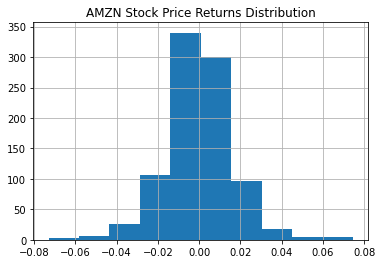

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

amzn_df['Returns'].hist()
plt.title('AMZN Stock Price Returns Distribution')
plt.show()

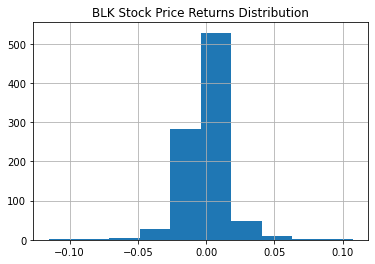

In [46]:
blk_df['Returns'].hist()
plt.title('BLK Stock Price Returns Distribution')
plt.show()

We can also calculate the mean returns and the standard deviation in returns for each stock and display them in the title of the histogram:

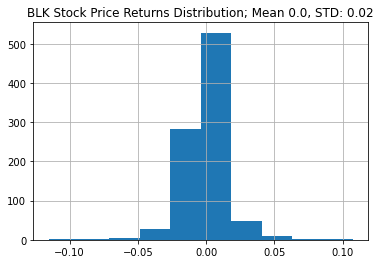

In [47]:
mean_blk_returns = np.round(blk_df['Returns'].mean(), 5)
std_blk_returns = np.round(blk_df['Returns'].std(), 2)
blk_df['Returns'].hist()
plt.title(f'BLK Stock Price Returns Distribution; Mean {mean_blk_returns}, STD: {std_blk_returns}')
plt.show()

#### Generate Boxplots

In [48]:
amzn_df['Ticker'] = 'AMZN'
googl_df['Ticker'] = 'GOOGL'
aapl_df['Ticker'] = 'AAPL'
blk_df['Ticker'] = 'BLK'
df = pd.concat([amzn_df, googl_df, aapl_df, blk_df])
df = df[['Ticker', 'Returns']]
print(df.head())


  Ticker   Returns
0   AMZN -0.003342
1   AMZN  0.007373
2   AMZN  0.013447
3   AMZN  0.024981
4   AMZN -0.013711


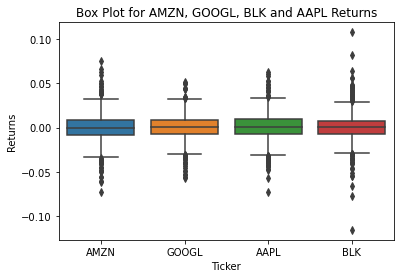

In [49]:
sns.boxplot(x= df['Ticker'], y = df['Returns'])
plt.title('Box Plot for AMZN, GOOGL, BLK and AAPL Returns')
plt.show()

#### Generate Correlation Heat Map:

In [50]:
df_corr = pd.DataFrame({'AMZN':amzn_df['Returns'],
                        'GOOGL':googl_df['Returns'],
                        'AAPL':aapl_df['Returns'], 
                        'BLK':blk_df['Returns']})

In [51]:
df_corr.corr()

,AMZN,GOOGL,AAPL,BLK
AMZN,1.000000,0.724916,0.657658,0.375303
GOOGL,0.724916,1.000000,0.673513,0.502296
AAPL,0.657658,0.673513,1.000000,0.461947
BLK,0.375303,0.502296,0.461947,1.000000


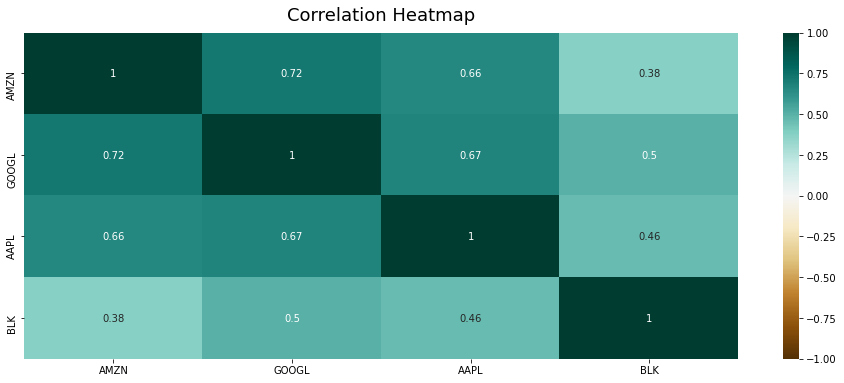

In [52]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

#### Moving Average

The moving average is a common technique analysts use to smooth out short-term fluctuations in stock prices to understand trends in price direction.

We’ll plot the 10-day moving average for the adjusted close stock price and consider stock prices after January 23, 2018 (Originally January 23, 2021): 

In [53]:
cutoff = datetime.datetime(2018,1,23)

blk_df['Date'] = pd.to_datetime(blk_df['Date'], format='%Y/%m/%d')
blk_df = blk_df[blk_df['Date'] > cutoff]
blk_df['SMA_10'] = blk_df['Close'].rolling(window=10).mean()
print(blk_df.head())


         Date        High         Low        Open       Close    Volume  \
10 2018-01-24  592.450012  583.179993  591.900024  587.669983  642200.0   
11 2018-01-25  585.929993  572.950012  585.000000  575.500000  892500.0   
12 2018-01-26  586.950012  577.119995  578.210022  586.799988  516600.0   
13 2018-01-29  585.530029  574.200012  585.530029  574.419983  611000.0   
14 2018-01-30  571.530029  562.179993  570.049988  562.289978  851100.0   

     Adj Close   Returns Ticker  SMA_10  
10  536.684937 -0.007147    BLK     NaN  
11  525.570679 -0.016239    BLK     NaN  
12  535.890198  0.014856    BLK     NaN  
13  524.584412 -0.018974    BLK     NaN  
14  513.506897 -0.013613    BLK     NaN  


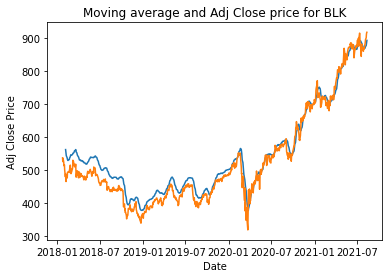

In [54]:
plt.plot(blk_df['Date'], blk_df['SMA_10'])
plt.plot(blk_df['Date'], blk_df['Adj Close'])
plt.title("Moving average and Adj Close price for BLK")
plt.ylabel('Adj Close Price')
plt.xlabel('Date')
plt.show()

#### Bollinger Bands

The Bollinger Band plot, which is a way to visualize the dispersion in the moving average. The bands are defined by upper and lower bounds that are two standard deviations away from the simple moving average. 

This is useful for traders because it allows them to take advantage of fluctuations in price volatilities:

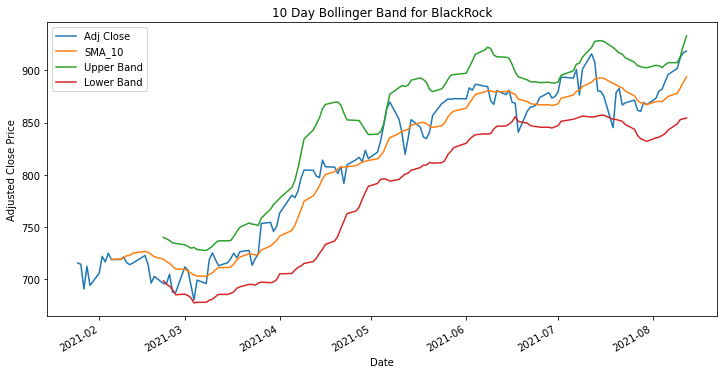

In [22]:
blk_df['SMA_10_STD'] = blk_df['Adj Close'].rolling(window=20).std()
blk_df['Upper Band'] = blk_df['SMA_10'] + (blk_df['SMA_10_STD'] * 2)
blk_df['Lower Band'] = blk_df['SMA_10'] - (blk_df['SMA_10_STD'] * 2)
blk_df.index = blk_df['Date']
blk_df[['Adj Close', 'SMA_10', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('10 Day Bollinger Band for BlackRock')
plt.ylabel('Adjusted Close Price')
plt.show()

## Time Series Analysis

Generate datasets with the close only:

In [57]:
df_close_blk = blk_df[['Date', 'Close']]
df_close_amzn = amzn_df[['Date', 'Close']]
df_close_googl = googl_df[['Date', 'Close']]
df_close_aapl = aapl_df[['Date', 'Close']]

In [58]:
df_close_blk.head()

,Date,Close
10,2018-01-24,587.669983
11,2018-01-25,575.500000
12,2018-01-26,586.799988
13,2018-01-29,574.419983
14,2018-01-30,562.289978


Convert date into index:

In [59]:
df_close_blk.index = df_close_blk['Date']
del df_close_blk['Date']
print(df_close_blk.head())

                 Close
Date                  
2018-01-24  587.669983
2018-01-25  575.500000
2018-01-26  586.799988
2018-01-29  574.419983
2018-01-30  562.289978


C:\Users\I0473941\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

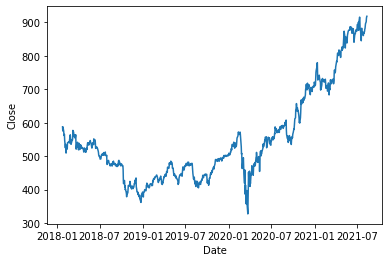

In [60]:
sns.lineplot(df_close_blk.index, df_close_blk['Close'])

In [61]:
rolling_mean = df_close_blk.rolling(7).mean()
rolling_std = df_close_blk.rolling(7).std()

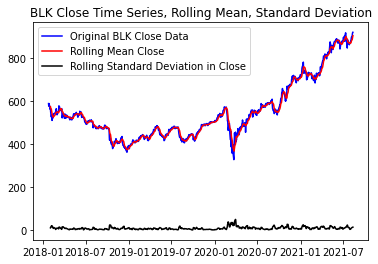

In [62]:
plt.plot(df_close_blk,color="blue", label="Original BLK Close Data")
plt.plot(rolling_mean, color="red",label="Rolling Mean Close")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Close")
plt.title("BLK Close Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

#### Stationarity

In [64]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df_close_blk,
                autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3],
                                    adft[4]["1%"], adft[4]["5%"],
                                    adft[4]["10%"]] ,
                          "Metric":["Test Statistics",
                                    "p-value",
                                    "No. of lags used",
                                    "Number of observations used",
                                    "critical value (1%)",
                                    "critical value (5%)",
                                    "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    0.810851              Test Statistics
1    0.991809                      p-value
2   11.000000             No. of lags used
3  883.000000  Number of observations used
4   -3.437777          critical value (1%)
5   -2.864819          critical value (5%)
6   -2.568516         critical value (10%)


#### Autocorrelation

In [67]:
autocorrelation_lag1 = df_close_blk["Close"].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9972301244036411


In [68]:
autocorrelation_lag3 = df_close_blk["Close"].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df_close_blk["Close"].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df_close_blk["Close"].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.9926739186730033
Six Month Lag:  0.9861355688797132
Nine Month Lag:  0.9785924996014697


#### Decomposition

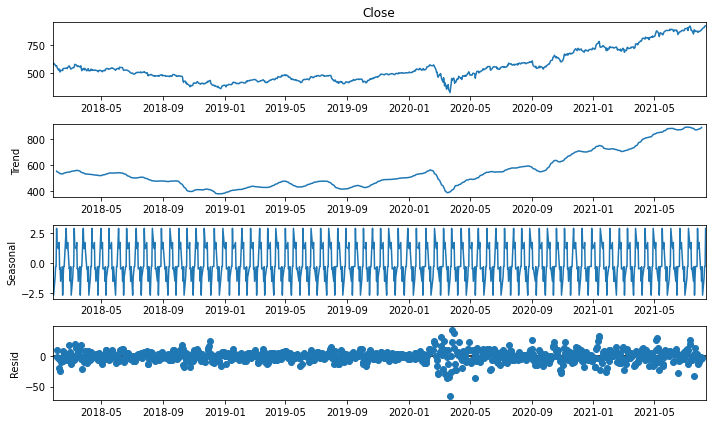

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposeBLK12 = seasonal_decompose(df_close_blk['Close'],
                               model='additive',
                               period=12)

decomposeBLK12.plot()
plt.show()

#### Forecasting

In [78]:
df_close_blk

,Close,Date
Date,,
2018-01-24,587.669983,2018-01-24
2018-01-25,575.500000,2018-01-25
2018-01-26,586.799988,2018-01-26
2018-01-29,574.419983,2018-01-29
2018-01-30,562.289978,2018-01-30
...,...,...
2021-08-06,896.090027,2021-08-06
2021-08-09,901.969971,2021-08-09
2021-08-10,912.559998,2021-08-10


<ipython-input-84-2557a7e2072a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close_blk['Date'] = df_close_blk.index
<ipython-input-84-2557a7e2072a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Close']
<ipython-input-84-2557a7e2072a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

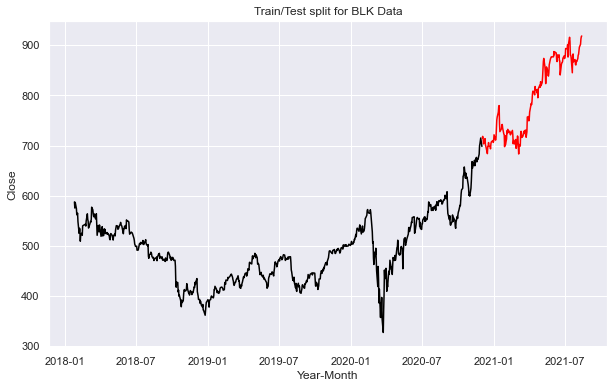

In [84]:
df_close_blk['Date'] = df_close_blk.index

train = df_close_blk[df_close_blk['Date'] < pd.to_datetime('2020-12-01', format='%Y/%m/%d')]
train['train'] = train['Close']
del train['Date']
del train['Close']

test = df_close_blk[df_close_blk['Date'] >= pd.to_datetime('2020-12-01', format='%Y/%m/%d')]
del test['Date']
test['test'] = test['Close']
del test['Close']

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for BLK Data")
plt.ylabel("Close")
plt.xlabel('Year-Month')
sns.set()
plt.show()

#### ARIMA

In [86]:
!pip install pmdarima

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'C:\\Users\\I0473941\\Anaconda3\\Lib\\site-packages\\~tatsmodels\\tsa\\kalmanf\\kalman_loglike.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [87]:
from pmdarima.arima import auto_arima

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index = test.index,columns=['Prediction'])

ModuleNotFoundError: No module named 'pmdarima'